# Predictions from Dataset for Misbehaviors in VANETs

<p><b>Author</b>: Jingze Dai</p>
<p><b>McMaster University</b>, Honors Computer Science (Coop) student</p>
<p><b>Personal Email Address</b>: <a>david1147062956@gmail.com</a>, or <a>dai.jingze@icloud.com</a></p>
<a href="https://github.com/daijingz">Github Homepage</a>
<a href="https://www.linkedin.com/in/jingze-dai/">Linkedin Webpage</a>
<a href="https://leetcode.com/david1147062956/">Leetcode Webpage</a>

<i>This project is a re-creation of the VANETs automatic driving vehicle research project. (See Reference [1], [2], [3])</i>

<i>Your Feedback is important for Jingze's further development. If you want to give feedback and suggestions, or you want to participate in working and learning together, please email Jingze at dai.jingze@icloud.com. If you want Jingze to provide contributions to your research or opensource project or you want Jingze to help you with any programming issues, please email Jingze at david1147062956@gmail.com. Thank you for your help.</i>

## Table of Contents:
* [Section 1: Extract and Load Datasets](#first-bullet)
* [Section 2: Comprehensive Data Observations](#second-bullet)
* [Section 3: Data Preprocessing (Data Cleaning)](#third-bullet)
* [Section 4: Feature Detection](#bullet4)
* [Section 5.1: Classification (Binary Classification Approach (BCA))](#bullet5-1)
* [Section 5.2: Classification (A Multi-class Classification Approach for Three Classes (MCATC))](#bullet5-2)
* [Section 5.3: Classification (A Classic Learning Approach for Multi-class classification (C-LAMC))](#bullet5-3)
* [Section 5.4: Classification (A Guided Learning Approach for Multi-class Classification (G-LAMC))](#bullet5-4)
* [Bibilography](#bib)

### <a class="anchor" id="first-bullet"><b>Section 1</b>: Extract and Load Datasets</a>

The first step is to install all necessary packages and libraries.

In [2]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade tensorflow --user

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --user numpy==1.24.4

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade scipy

Note: you may need to restart the kernel to use updated packages.


<p>There are two methods to download the package, choose one of them to download the dataset: </p>
<p><b>Method 1</b>: Using gdown commands (Sometimes with errors)</p>

<p>Here we download the CSV VANETs dataset file from remote google drive, and savce it in your local computer's download folder. </p>
The <b>correct</b> dataset name is "mixalldata_clean.csv".

In [7]:
import pandas as pd
import gdown

# Replace 'YOUR_FILE_ID' with the actual file ID
file_id = '1mbQUfSEe2EU2sh40Q1Q0KiZD-k7vRuU9'

# Construct the download link
file_url = f'https://drive.google.com/uc?id={file_id}'

# Use gdown to download the file
output_file = 'mixalldata_clean.csv'
gdown.download(file_url, output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1mbQUfSEe2EU2sh40Q1Q0KiZD-k7vRuU9
From (redirected): https://drive.google.com/uc?id=1mbQUfSEe2EU2sh40Q1Q0KiZD-k7vRuU9&confirm=t&uuid=dc28acae-baec-4f52-9ca2-0944a59eeee6
To: C:\Users\david\Downloads\mixalldata_clean.csv
100%|█████████████████████████████████████████████████████████████████████████████| 1.21G/1.21G [00:26<00:00, 45.6MB/s]


'mixalldata_clean.csv'

<p><b>Method 2</b>: Direct downloading from sources</p>
At first, go to the webpage <a href="https://data.mendeley.com/datasets/k62n4z9gdz/1">Dataset for Misbehaviors in VANETs</a>.
Then click the button "Download All 314 MB". Then de-compress this compressed folder.

<b>Expected Outcome</b>
<p>After downloading the dataset, to have a good double check, the program below prints out the first 5 records inside.</p>

In [8]:
import pandas as pd
import gdown

# Load the dataset
output_file = 'mixalldata_clean.csv'
df = pd.read_csv(output_file)

# Display the DataFrame
print(df.head())

   type      sendTime  sender  senderPseudo  messageID  class        posx  \
0     4  72002.302942  130137     101301377  422013806      0  266.982401   
1     4  72003.302942  130137     101301377  422023410      0  266.827208   
2     4  72004.302942  130137     101301377  422032081      0  266.420297   
3     4  72005.302942  130137     101301377  422040712      0  268.912026   
4     4  72006.302942  130137     101301377  422052949      0  268.242276   

        posy  posz    posx_n  ...  aclz    aclx_n    acly_n  aclz_n      hedx  \
0  32.336955   0.0  3.480882  ...   0.0  0.000862  0.000862     0.0 -0.102790   
1  34.624145   0.0  3.546261  ...   0.0  0.000107  0.001040     0.0 -0.099856   
2  38.836461   0.0  3.544045  ...   0.0  0.000172  0.001661     0.0 -0.099856   
3  45.414229   0.0  3.340080  ...   0.0  0.000171  0.001654     0.0 -0.100172   
4  53.729986   0.0  3.328872  ...   0.0  0.000193  0.001852     0.0 -0.097105   

       hedy  hedz     hedx_n     hedy_n  hedz_n  


<b>Important: before completing later sections, please run all of this section programs in order to prevent possible errors.</b>

### <a class="anchor" id="second-bullet"><b>Section 2</b>: Comprehensive Data Observations</a>

<p>There are 30 attributes and 1048575 records in this dataset, and there is no empty values in each field.</p>
<p>These attributes are: `type`, `sendTime`, `sender`, `senderPseudo`, `messageID`, `class`, `posx`, `posy`, `posz`, `posx_n`, `posy_n`, `posz_n`, `spdx`, `spdy`, `spdz`, `spdx_n`, `spdy_n`, `spdz_n`, `aclx`, `acly`, `aclz`, `aclx_n`, `acly_n`, `aclz_n`, `hedx`, `hedy`, `hedz`, `hedx_n`, `hedy_n`, `hedz_n`</p>
<br>
<p>`type`: verhicle type (<b>Confused</b>, because it may be message types)</p>
<p>`sendTime`: time this message was sent</p>
<p>`sender`: id of the message sender (this sender id may have unique values)</p>
<p>`senderPseudo`: pseudonym of the message sender</p>
<p>`messageID`: each message's identifier (has unique values)</p>
<p>`class`: behavior or misbehavior outcomes</p>
<br>
<b>Hidden Information</b>
<ol>
    <li>From Physics, we know that the given information about positions, speeds, and accelerations have already shown directions. Their inconsistencies with heading positions may indicate misbehaviors.</li>
</ol>

<p>Here are all columns' data types (<b>int64</b>: 64-bit signed integer, and <b>float64</b>: 64-bit signed floating-point number):</p>

In [9]:
# apply the dtype attribute
data_types = df.dtypes

print("Data types:")
print(data_types)

Data types:
type              int64
sendTime        float64
sender            int64
senderPseudo      int64
messageID         int64
class             int64
posx            float64
posy            float64
posz            float64
posx_n          float64
posy_n          float64
posz_n          float64
spdx            float64
spdy            float64
spdz            float64
spdx_n          float64
spdy_n          float64
spdz_n          float64
aclx            float64
acly            float64
aclz            float64
aclx_n          float64
acly_n          float64
aclz_n          float64
hedx            float64
hedy            float64
hedz            float64
hedx_n          float64
hedy_n          float64
hedz_n          float64
dtype: object


### <a class="anchor" id="third-bullet"><p><b>Section 3</b>: Data Preprocessing (Data Cleaning)</p></a>

<i>The provided dataset "mixalldata_clean.csv" is already data-cleanned. However, data cleaning processes are still executed below.</i>

<p><b>Potential Problem 1</b>: unnamed columns -> <b>Does Not Exist</b>, by observation, all 30 column have valid names.</p>
<p><b>Potential Problem 2</b>: existence of null values.</p>

In [8]:
# At first, display the check on each value is null or not.
null_df = df.isnull()
print(null_df)

          type  sendTime  sender  senderPseudo  messageID  class   posx  \
0        False     False   False         False      False  False  False   
1        False     False   False         False      False  False  False   
2        False     False   False         False      False  False  False   
3        False     False   False         False      False  False  False   
4        False     False   False         False      False  False  False   
...        ...       ...     ...           ...        ...    ...    ...   
3194803  False     False   False         False      False  False  False   
3194804  False     False   False         False      False  False  False   
3194805  False     False   False         False      False  False  False   
3194806  False     False   False         False      False  False  False   
3194807  False     False   False         False      False  False  False   

          posy   posz  posx_n  ...   aclz  aclx_n  acly_n  aclz_n   hedx  \
0        False  False  

In [9]:
# Secondly, check how many null values on each column, and display their counts.
null_val_count = df.isna().sum()
print(null_val_count)

type            0
sendTime        0
sender          0
senderPseudo    0
messageID       0
class           0
posx            0
posy            0
posz            0
posx_n          0
posy_n          0
posz_n          0
spdx            0
spdy            0
spdz            0
spdx_n          0
spdy_n          0
spdz_n          0
aclx            0
acly            0
aclz            0
aclx_n          0
acly_n          0
aclz_n          0
hedx            0
hedy            0
hedz            0
hedx_n          0
hedy_n          0
hedz_n          0
dtype: int64


<p>As you can see, this dataset does not have null values, so there is nothing to do with null value removing.</p>

<p><b>Potential Problem 3</b>: Wrong-Format Data -> <b>Does Not Exist</b>, by observation, all 30 column have valid types, and their values are consistent with these mentioned types. There is no need to convert them.</p>

<p><b>Potential Problem 4</b>: Data with inappropriate values -> <b>Does Not Exist</b>, because the range and other constraints have not been given.</p>

<p><b>Potential Problem 5</b>: Duplicate Rows -> <b>Does Not Exist</b>, by observation, there is no repeated rows (comparing all values).</p>

In [10]:
# Find the total amount of duplicate records
duplicate_record = df.duplicated().sum()

print("Total Records Duplications: " + str(duplicate_record))

Total Records Duplications: 0


<p>Seems like no rows are repeated, then I check each column, and I found that only the column "messageID" needs to have unique values (since they are identifiers). While other columns, accept repetitions on values.</p>

In [11]:
# Find the total amount of records with duplicate "messageID"
duplicate_rows = df.duplicated(subset=['messageID']).sum()

print("Duplicated messageID Rows: " + str(duplicate_rows))

Duplicated messageID Rows: 0


### <a class="anchor" id="bullet4"><p><b>Section 4</b>: Feature Detection</p></a>

<p>In this section, I determine all columns that have relevances with autonomous vehicle misbehavior outcomes. (whether or not each of them is relating to misbehaviors.) All irrelevant columns are neglected in the next step.</p>
<i>Remember this step does not include training/testing a model (There is no need to separate the datset)</i>
<p><b>Method 1</b>: Study the effect of every feature on the labeled class (binary effect, each feature and the "class" outcome)</p>

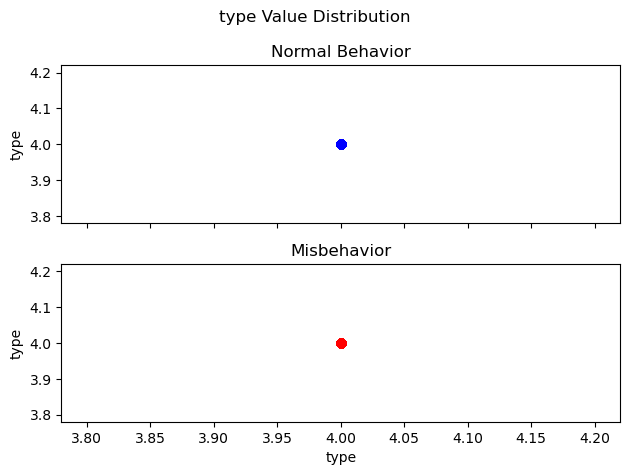

In [12]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('type Value Distribution')

type_n_Val_x = df[df['class'] == 0]['type'].tolist()
type_n_Val_y = type_n_Val_x

axs[0].scatter(type_n_Val_x, type_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')

type_d_Val_x = df[df['class'] != 0]['type'].tolist()
type_d_Val_y = type_d_Val_x

axs[1].scatter(type_d_Val_x, type_d_Val_y, color='red')
axs[1].set_title('Misbehavior')

for ax in axs.flat:
    ax.set(xlabel='type', ylabel='type')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, both red points and green points repeated in the same position (4, 4), which means that all records, regardless of class values, have value 4 in the type column. There is no difference, so the column "<b>type</b>" is irrelevant to misbehavior distributions.</p>

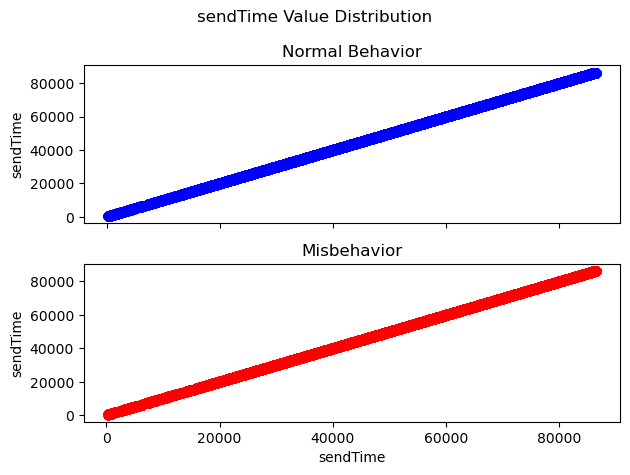

In [13]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('sendTime Value Distribution')

sdt_n_Val_x = df[df['class'] == 0]['sendTime'].tolist()
sdt_n_Val_y = sdt_n_Val_x

axs[0].scatter(sdt_n_Val_x, sdt_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')

sdt_d_Val_x = df[df['class'] != 0]['sendTime'].tolist()
sdt_d_Val_y = sdt_d_Val_x

axs[1].scatter(sdt_d_Val_x, sdt_d_Val_y, color='red')
axs[1].set_title('Misbehavior')

for ax in axs.flat:
    ax.set(xlabel='sendTime', ylabel='sendTime')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, both red points and green points repeated in the same area, which means that all records, regardless of class values, have values between [0, about 86500] in the sendTime column. There is no difference, so the column "<b>sendTime</b>" is irrelevant to misbehavior distributions.</p>

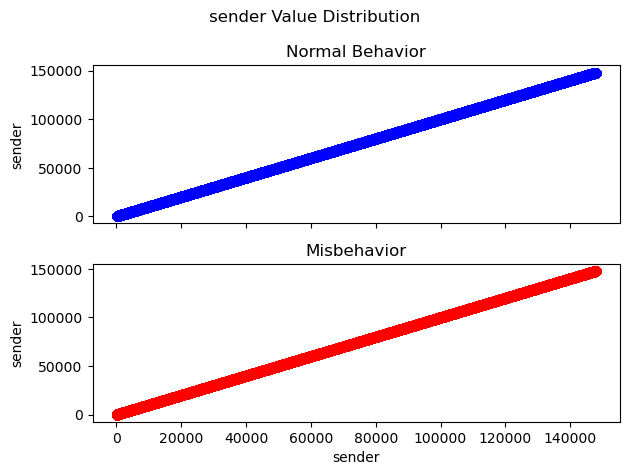

In [14]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('sender Value Distribution')

sder_n_Val_x = df[df['class'] == 0]['sender'].tolist()
sder_n_Val_y = sder_n_Val_x

axs[0].scatter(sder_n_Val_x, sder_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('sender')
axs[0].set_ylabel('sender')

sder_d_Val_x = df[df['class'] != 0]['sender'].tolist()
sder_d_Val_y = sder_d_Val_x

axs[1].scatter(sder_d_Val_x, sder_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('sender')
axs[1].set_ylabel('sender')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, both red points and green points repeated in the same area, which means that all records. There is no difference, so the column "<b>sender</b>" is irrelevant to misbehavior distributions.</p>

In [16]:
from matplotlib import pyplot as plt
min_sps = min(df['senderPseudo'])
max_sps = max(df['senderPseudo'])
min_val = min(min_sps_n, min_sps_d)
max_val = max(max_sps_n, max_sps_d)
fig, axs = plt.subplots(2)
fig.suptitle('senderPseudo Value Distribution')

sps_n_Val_x = df[df['class'] == 0]['senderPseudo'].tolist()
sps_n_Val_y = sps_n_Val_x

axs[0].scatter(sps_n_Val_x, sps_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('senderPseudo')
axs[0].set_ylabel('senderPseudo')
axs[0].set_xlim(min_sps, max_sps)
axs[0].set_ylim(min_sps, max_sps)

sps_d_Val_x = df[df['class'] != 0]['senderPseudo'].tolist()
sps_d_Val_y = sps_d_Val_x

axs[1].scatter(sps_d_Val_x, sps_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('senderPseudo')
axs[1].set_ylabel('senderPseudo')
axs[1].set_xlim(min_sps, max_sps)
axs[1].set_ylim(min_sps, max_sps)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

NameError: name 'min_sps_n' is not defined

<p>Looks like there are a lot of differences between normal behaviors and misbehaviors, since normal behaviors only use a few senderpseudos, while misbehaviors' senderpseudos are wide-spread. Therefore, column "<b>senderpseudo</b>" is a variable relevant to misbehavior determinations.</p>

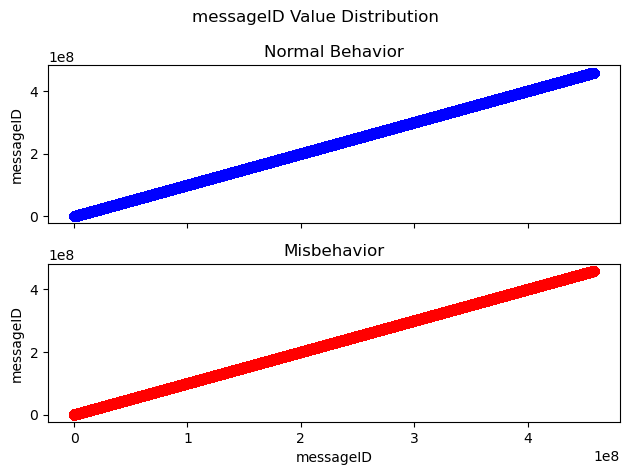

In [16]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('messageID Value Distribution')

mesgid_n_Val_x = df[df['class'] == 0]['messageID'].tolist()
mesgid_n_Val_y = mesgid_n_Val_x

axs[0].scatter(mesgid_n_Val_x, mesgid_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('messageID')
axs[0].set_ylabel('messageID')

mesgid_d_Val_x = df[df['class'] != 0]['messageID'].tolist()
mesgid_d_Val_y = mesgid_d_Val_x

axs[1].scatter(mesgid_d_Val_x, mesgid_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('messageID')
axs[1].set_ylabel('messageID')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>Almost where normal behavior occurs, where there are some misbehaviors. Therefore, the column "<b>messageID</b>" is a irrelevant variable</p>

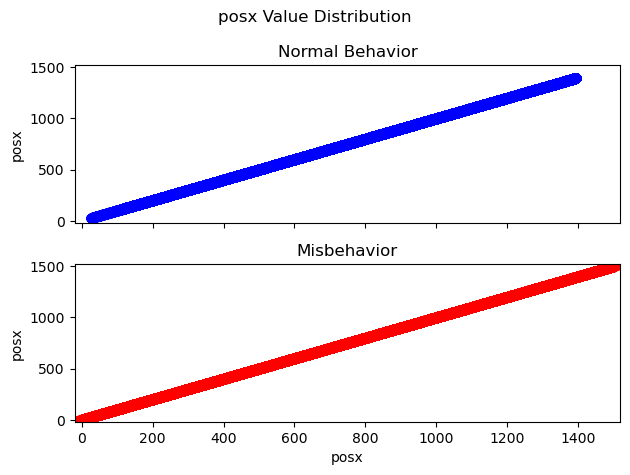

In [15]:
from matplotlib import pyplot as plt
min_posx = min(df['posx'])
max_posx = max(df['posx'])
fig, axs = plt.subplots(2)
fig.suptitle('posx Value Distribution')

posx_n_Val_x = df[df['class'] == 0]['posx'].tolist()
posx_n_Val_y = posx_n_Val_x

axs[0].scatter(posx_n_Val_x, posx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posx')
axs[0].set_ylabel('posx')
axs[0].set_xlim(min_posx, max_posx)
axs[0].set_ylim(min_posx, max_posx)

posx_d_Val_x = df[df['class'] != 0]['posx'].tolist()
posx_d_Val_y = posx_d_Val_x

axs[1].scatter(posx_d_Val_x, posx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posx')
axs[1].set_ylabel('posx')
axs[1].set_xlim(min_posx, max_posx)
axs[1].set_ylim(min_posx, max_posx)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

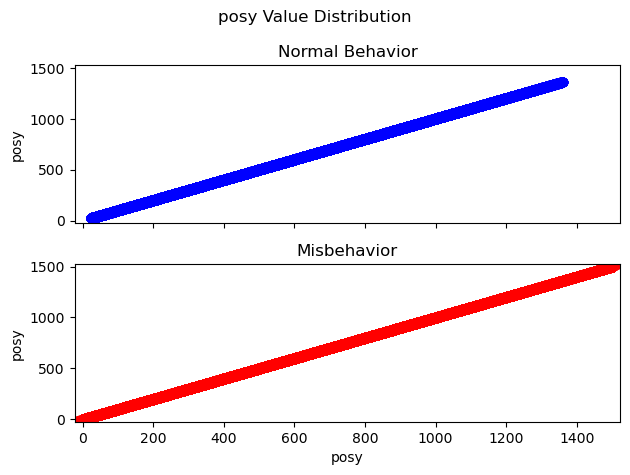

In [14]:
from matplotlib import pyplot as plt
min_posy = min(df['posy'])
max_posy = max(df['posy'])
fig, axs = plt.subplots(2)
fig.suptitle('posy Value Distribution')

posy_n_Val_x = df[df['class'] == 0]['posy'].tolist()
posy_n_Val_y = posy_n_Val_x

axs[0].scatter(posy_n_Val_x, posy_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posy')
axs[0].set_ylabel('posy')
axs[0].set_xlim(min_posy, max_posy)
axs[0].set_ylim(min_posy, max_posy)

posy_d_Val_x = df[df['class'] != 0]['posy'].tolist()
posy_d_Val_y = posy_d_Val_x

axs[1].scatter(posy_d_Val_x, posy_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posy')
axs[1].set_ylabel('posy')
axs[1].set_xlim(min_posy, max_posy)
axs[1].set_ylim(min_posy, max_posy)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

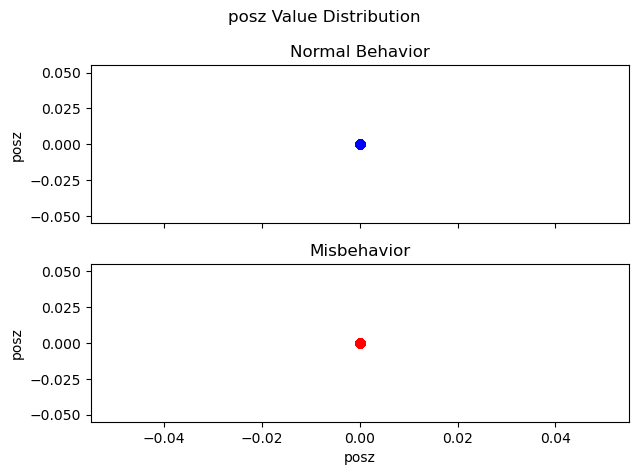

In [19]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('posz Value Distribution')

posz_n_Val_x = df[df['class'] == 0]['posz'].tolist()
posz_n_Val_y = posz_n_Val_x

axs[0].scatter(posz_n_Val_x, posz_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posz')
axs[0].set_ylabel('posz')

posz_d_Val_x = df[df['class'] != 0]['posz'].tolist()
posz_d_Val_y = posz_d_Val_x

axs[1].scatter(posz_d_Val_x, posz_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posz')
axs[1].set_ylabel('posz')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>From these results we have two different findings:</p>
<ol>
  <li>Variables "<b>posx</b>", "<b>posy</b>", and "<b>posz</b>" do not have unary correlations with the misbehavior outcome.</li>
  <li>Variable "<b>posz</b>" always has the value 0, and it is irrelevant to the misbehavior outcome.</li>
</ol>

<p>Then we need to find the binary relationships between (posx, posy) and the misbehavior outcome: </p>

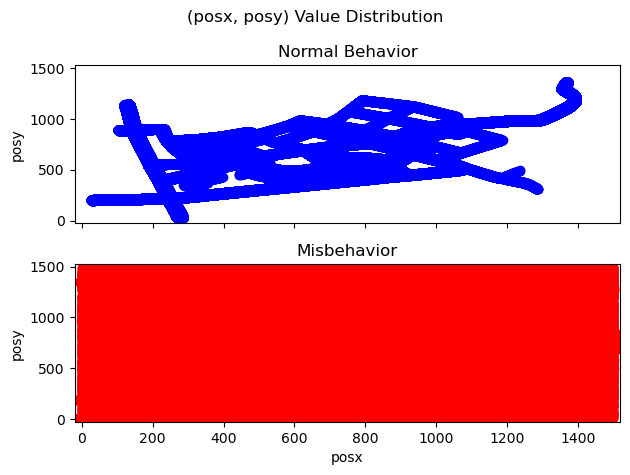

In [13]:
from matplotlib import pyplot as plt
min_posx = min(df['posx'])
max_posx = max(df['posx'])
min_posy = min(df['posy'])
max_posy = max(df['posy'])
fig, axs = plt.subplots(2)
fig.suptitle('(posx, posy) Value Distribution')

bixy_n_Val_x = df[df['class'] == 0]['posx'].tolist()
bixy_n_Val_y = df[df['class'] == 0]['posy'].tolist()

axs[0].scatter(bixy_n_Val_x, bixy_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posx')
axs[0].set_ylabel('posy')
axs[0].set_xlim(min_posx, max_posx)
axs[0].set_ylim(min_posy, max_posy)

bixy_d_Val_x = df[df['class'] != 0]['posx'].tolist()
bixy_d_Val_y = df[df['class'] != 0]['posy'].tolist()

axs[1].scatter(bixy_d_Val_x, bixy_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posx')
axs[1].set_ylabel('posy')
axs[1].set_xlim(min_posx, max_posx)
axs[1].set_ylim(min_posy, max_posy)


for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, normal behaviors only occurs in a narrow blue area, while misbehaviors occurs everywhere. Therefore, (<b>posx, posy</b>) is a relevant variable in the determination of misbehaviors.</p>

<p>Then we consider normalized position variables, and note that, since before position z does not have any changes (always have value 0), we do not consider normalized position z as a relevant variable.</p>

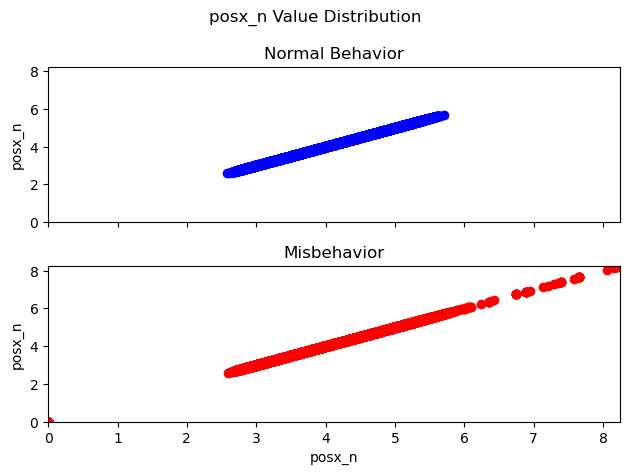

In [17]:
from matplotlib import pyplot as plt
min_posxn = min(df['posx_n'])
max_posxn = max(df['posx_n'])
fig, axs = plt.subplots(2)
fig.suptitle('posx_n Value Distribution')

posxn_n_Val_x = df[df['class'] == 0]['posx_n'].tolist()
posxn_n_Val_y = posxn_n_Val_x

axs[0].scatter(posxn_n_Val_x, posxn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posx_n')
axs[0].set_ylabel('posx_n')
axs[0].set_xlim(min_posxn, max_posxn)
axs[0].set_ylim(min_posxn, max_posxn)

posxn_d_Val_x = df[df['class'] != 0]['posx_n'].tolist()
posxn_d_Val_y = posxn_d_Val_x

axs[1].scatter(posxn_d_Val_x, posxn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posx_n')
axs[1].set_ylabel('posx_n')
axs[1].set_xlim(min_posxn, max_posxn)
axs[1].set_ylim(min_posxn, max_posxn)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

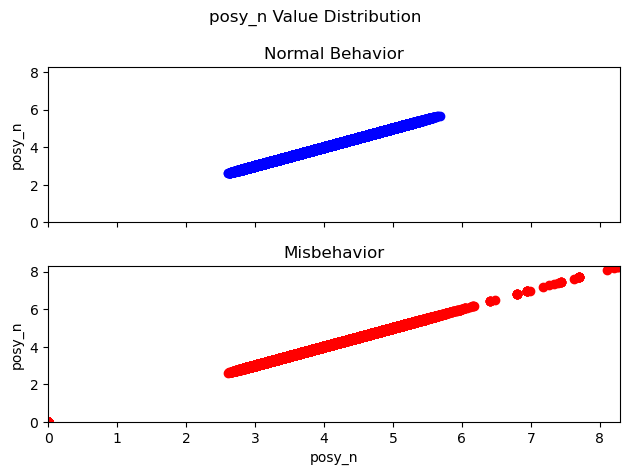

In [18]:
from matplotlib import pyplot as plt
min_posyn = min(df['posy_n'])
max_posyn = max(df['posy_n'])
fig, axs = plt.subplots(2)
fig.suptitle('posy_n Value Distribution')

posyn_n_Val_x = df[df['class'] == 0]['posy_n'].tolist()
posyn_n_Val_y = posyn_n_Val_x

axs[0].scatter(posyn_n_Val_x, posyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posy_n')
axs[0].set_ylabel('posy_n')
axs[0].set_xlim(min_posyn, max_posyn)
axs[0].set_ylim(min_posyn, max_posyn)

posyn_d_Val_x = df[df['class'] != 0]['posy_n'].tolist()
posyn_d_Val_y = posyn_d_Val_x

axs[1].scatter(posyn_d_Val_x, posyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posy_n')
axs[1].set_ylabel('posy_n')
axs[1].set_xlim(min_posyn, max_posyn)
axs[1].set_ylim(min_posyn, max_posyn)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>Both "<b>posx_n</b>" and "<b>posy_n</b>" are unary-relevant because of their differences between normal behaviors and misbehaviors. Then we find the binary relationships between them and the misbehavior outcome.</p>

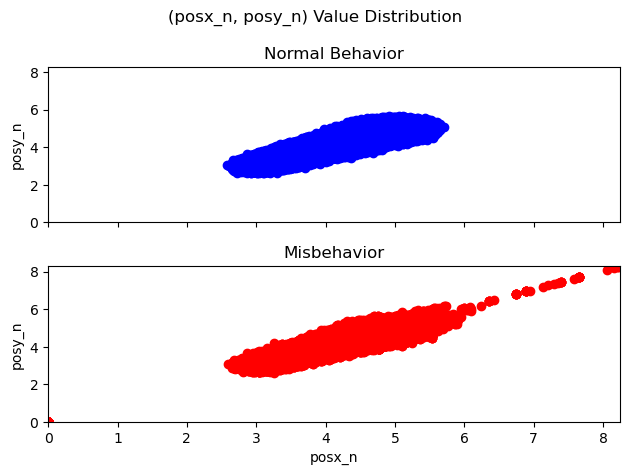

In [19]:
from matplotlib import pyplot as plt
min_posxn = min(df['posx_n'])
max_posxn = max(df['posx_n'])
min_posyn = min(df['posy_n'])
max_posyn = max(df['posy_n'])
fig, axs = plt.subplots(2)
fig.suptitle('(posx_n, posy_n) Value Distribution')

bixyn_n_Val_x = df[df['class'] == 0]['posx_n'].tolist()
bixyn_n_Val_y = df[df['class'] == 0]['posy_n'].tolist()

axs[0].scatter(bixyn_n_Val_x, bixyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('posx_n')
axs[0].set_ylabel('posy_n')
axs[0].set_xlim(min_posxn, max_posxn)
axs[0].set_ylim(min_posyn, max_posyn)

bixyn_d_Val_x = df[df['class'] != 0]['posx_n'].tolist()
bixyn_d_Val_y = df[df['class'] != 0]['posy_n'].tolist()

axs[1].scatter(bixyn_d_Val_x, bixyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('posx_n')
axs[1].set_ylabel('posy_n')
axs[1].set_xlim(min_posxn, max_posxn)
axs[1].set_ylim(min_posyn, max_posyn)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, the pair <b>(posx, posy)</b> has correlations with the misbehavior outcome, since there are several outliners outside of the ellipse.</p>
<p>Then we inspect the speed characteristics (variable <b>spdz</b> has value 0, and I do not consider it as a relevant variable)</p>

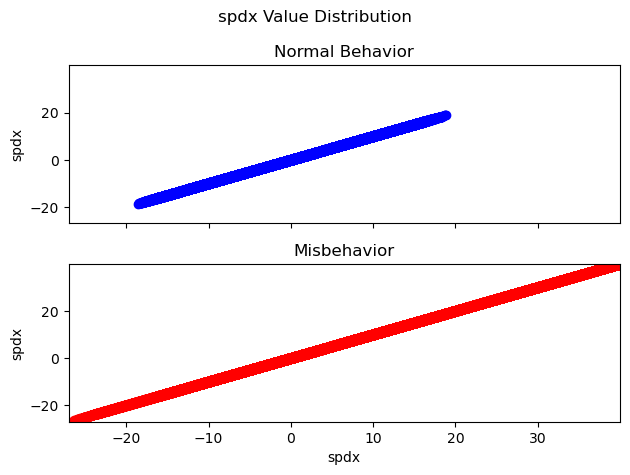

In [20]:
from matplotlib import pyplot as plt
min_spdx = min(df['spdx'])
max_spdx = max(df['spdx'])
fig, axs = plt.subplots(2)
fig.suptitle('spdx Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['spdx'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdx')
axs[0].set_ylabel('spdx')
axs[0].set_xlim(min_spdx, max_spdx)
axs[0].set_ylim(min_spdx, max_spdx)

spdx_d_Val_x = df[df['class'] != 0]['spdx'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdx')
axs[1].set_ylabel('spdx')
axs[1].set_xlim(min_spdx, max_spdx)
axs[1].set_ylim(min_spdx, max_spdx)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

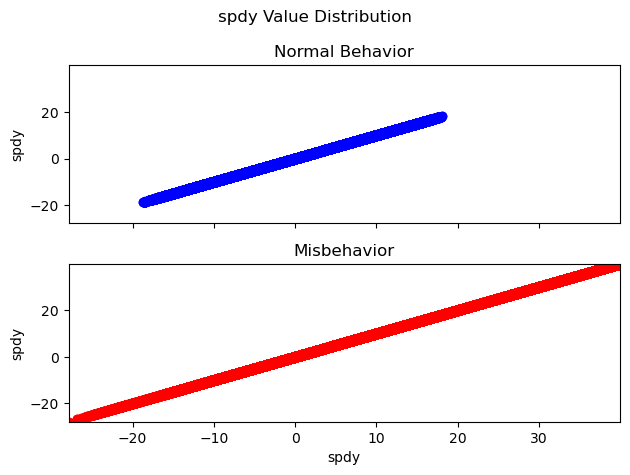

In [21]:
from matplotlib import pyplot as plt
min_spdy = min(df['spdy'])
max_spdy = max(df['spdy'])
fig, axs = plt.subplots(2)
fig.suptitle('spdy Value Distribution')

spdy_n_Val_x = df[df['class'] == 0]['spdy'].tolist()
spdy_n_Val_y = spdy_n_Val_x

axs[0].scatter(spdy_n_Val_x, spdy_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdy')
axs[0].set_ylabel('spdy')
axs[0].set_xlim(min_spdy, max_spdy)
axs[0].set_ylim(min_spdy, max_spdy)

spdy_d_Val_x = df[df['class'] != 0]['spdy'].tolist()
spdy_d_Val_y = spdy_d_Val_x

axs[1].scatter(spdy_d_Val_x, spdy_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdy')
axs[1].set_ylabel('spdy')
axs[1].set_xlim(min_spdy, max_spdy)
axs[1].set_ylim(min_spdy, max_spdy)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

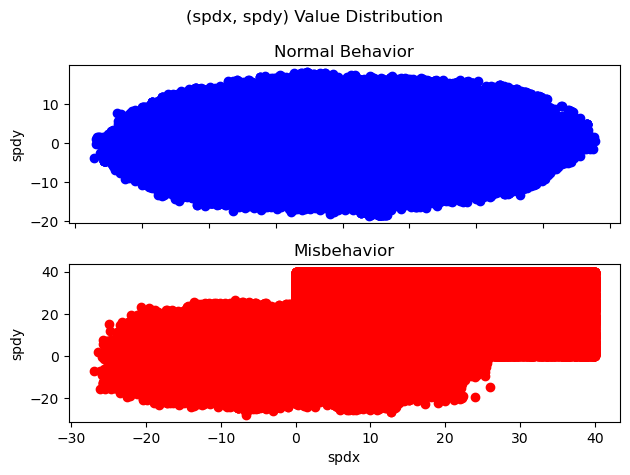

In [26]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('(spdx, spdy) Value Distribution')

bisxy_n_Val_x = df[df['class'] == 0]['spdx'].tolist()
bisxy_n_Val_y = df[df['class'] == 0]['spdy'].tolist()

axs[0].scatter(bisxy_n_Val_x, bisxy_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdx')
axs[0].set_ylabel('spdy')

bisxy_d_Val_x = df[df['class'] != 0]['spdx'].tolist()
bisxy_d_Val_y = df[df['class'] != 0]['spdy'].tolist()

axs[1].scatter(bisxy_d_Val_x, bisxy_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdx')
axs[1].set_ylabel('spdy')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, the pair <b>(spdx, spdy)</b> has correlations with the misbehavior outcome, since there are a rectangle that only belongs to misbehaviors.</p> (instead of normal behaviors)
<p>Then we inspect the normalized speed characteristics (variable <b>spdz_n</b> has value 0, and I do not consider it as a relevant variable)</p>

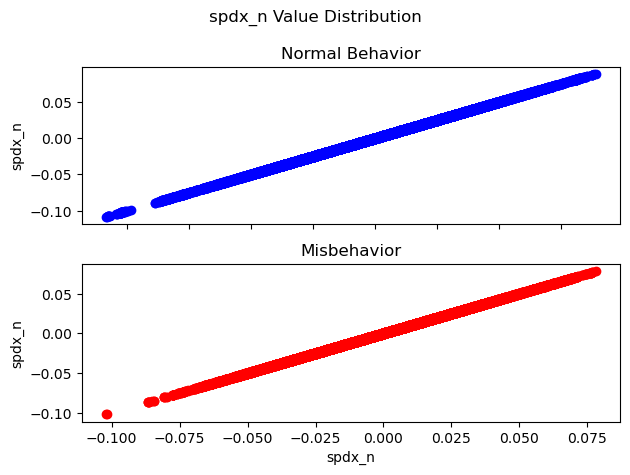

In [12]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('spdx_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['spdx_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdx_n')
axs[0].set_ylabel('spdx_n')

spdx_d_Val_x = df[df['class'] != 0]['spdx_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdx_n')
axs[1].set_ylabel('spdx_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

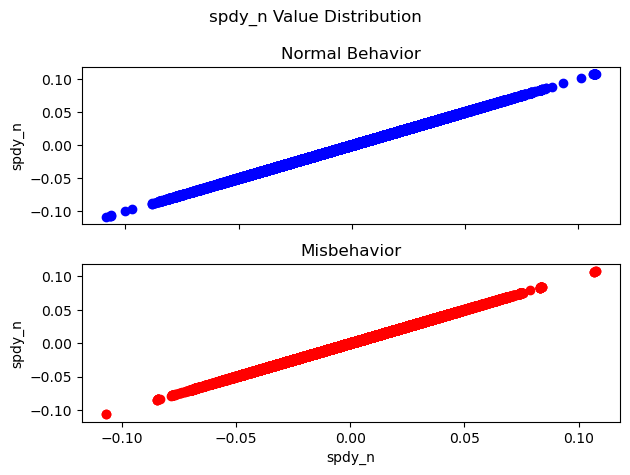

In [13]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('spdy_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['spdy_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdy_n')
axs[0].set_ylabel('spdy_n')

spdx_d_Val_x = df[df['class'] != 0]['spdy_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdy_n')
axs[1].set_ylabel('spdy_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

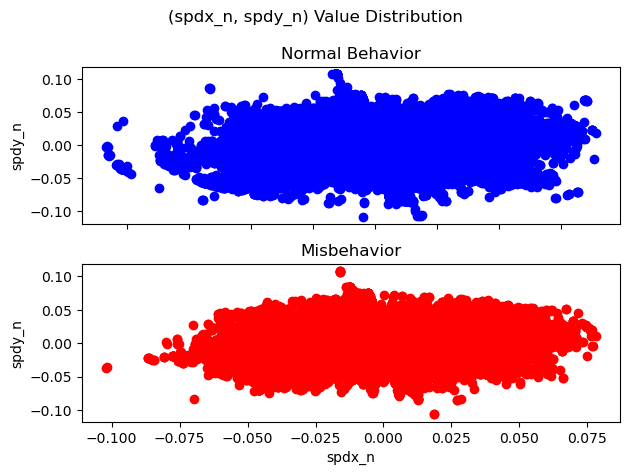

In [27]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('(spdx_n, spdy_n) Value Distribution')

bisxyn_n_Val_x = df[df['class'] == 0]['spdx_n'].tolist()
bisxyn_n_Val_y = df[df['class'] == 0]['spdy_n'].tolist()

axs[0].scatter(bisxyn_n_Val_x, bisxyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('spdx_n')
axs[0].set_ylabel('spdy_n')

bisxyn_d_Val_x = df[df['class'] != 0]['spdx_n'].tolist()
bisxyn_d_Val_y = df[df['class'] != 0]['spdy_n'].tolist()

axs[1].scatter(bisxyn_d_Val_x, bisxyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('spdx_n')
axs[1].set_ylabel('spdy_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>Seems like normal behavior has some unique outliners that misbehaviors does not have. Not only both <b>spdx_n</b> and <b>spdy_n</b> have slight distribution differences, but also the normalized speed pair <b>(spdx_n, spdy_n)</b> can be considered relevant to the misbehavior outcome.</p>

<p>Then we inspect the original acceleration characteristics (variable <b>aclz</b> has value 0, and I do not consider it as a relevant variable)</p>

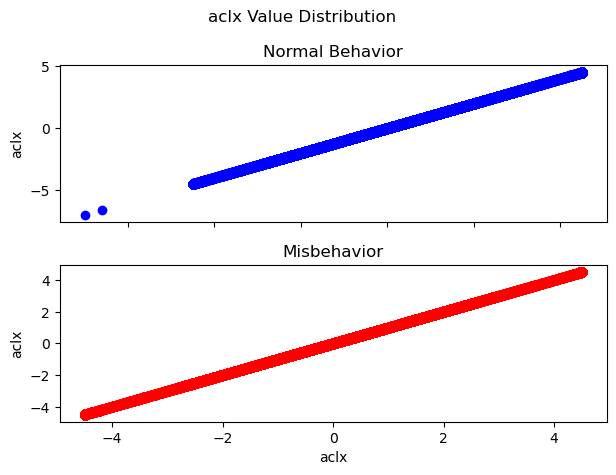

In [14]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('aclx Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['aclx'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('aclx')
axs[0].set_ylabel('aclx')

spdx_d_Val_x = df[df['class'] != 0]['aclx'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('aclx')
axs[1].set_ylabel('aclx')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

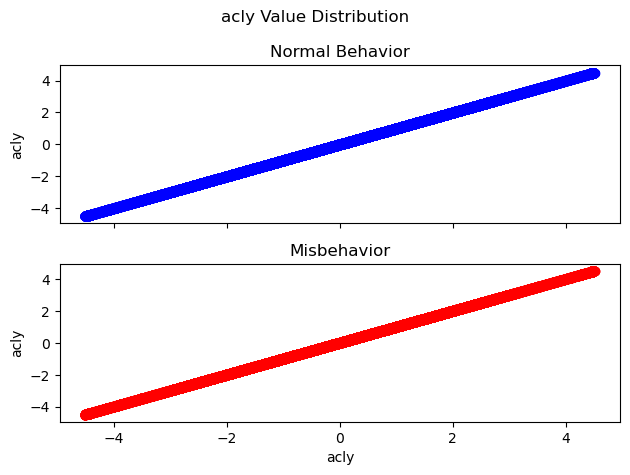

In [15]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('acly Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['acly'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('acly')
axs[0].set_ylabel('acly')

spdx_d_Val_x = df[df['class'] != 0]['acly'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('acly')
axs[1].set_ylabel('acly')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

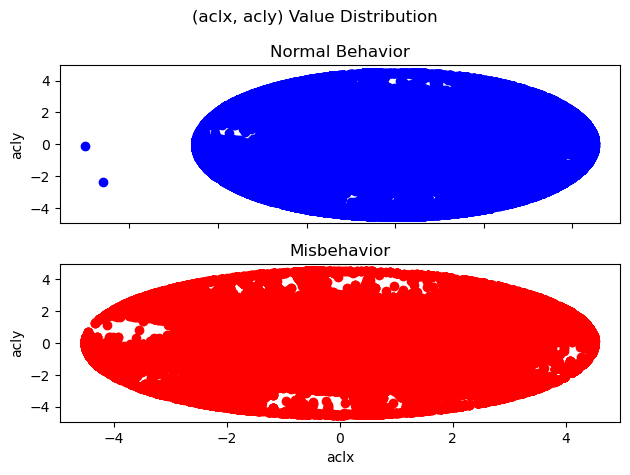

In [16]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('(aclx, acly) Value Distribution')

bisxyn_n_Val_x = df[df['class'] == 0]['aclx'].tolist()
bisxyn_n_Val_y = df[df['class'] == 0]['acly'].tolist()

axs[0].scatter(bisxyn_n_Val_x, bisxyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('aclx')
axs[0].set_ylabel('acly')

bisxyn_d_Val_x = df[df['class'] != 0]['aclx'].tolist()
bisxyn_d_Val_y = df[df['class'] != 0]['acly'].tolist()

axs[1].scatter(bisxyn_d_Val_x, bisxyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('aclx')
axs[1].set_ylabel('acly')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, the pair <b>(aclx, acly)</b> has correlations with the misbehavior outcome, since there are a rectangle that only belongs to misbehaviors.</p> (instead of normal behaviors)
<p>Then we inspect the normalized acceleration characteristics (variable <b>aclz_n</b> has value 0, and I do not consider it as a relevant variable)</p>

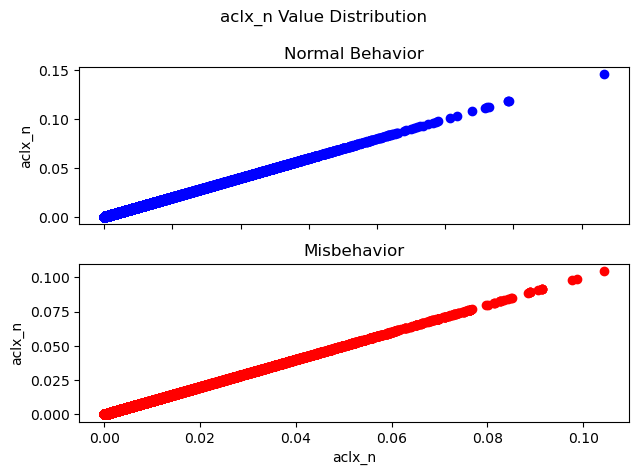

In [17]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('aclx_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['aclx_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('aclx_n')
axs[0].set_ylabel('aclx_n')

spdx_d_Val_x = df[df['class'] != 0]['aclx_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('aclx_n')
axs[1].set_ylabel('aclx_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

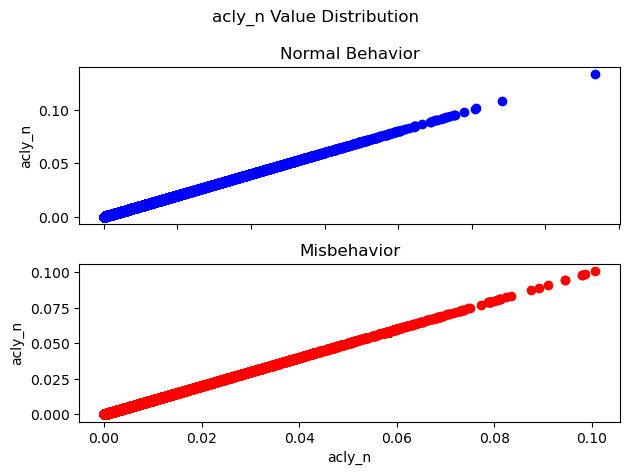

In [18]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('acly_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['acly_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('acly_n')
axs[0].set_ylabel('acly_n')

spdx_d_Val_x = df[df['class'] != 0]['acly_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('acly_n')
axs[1].set_ylabel('acly_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

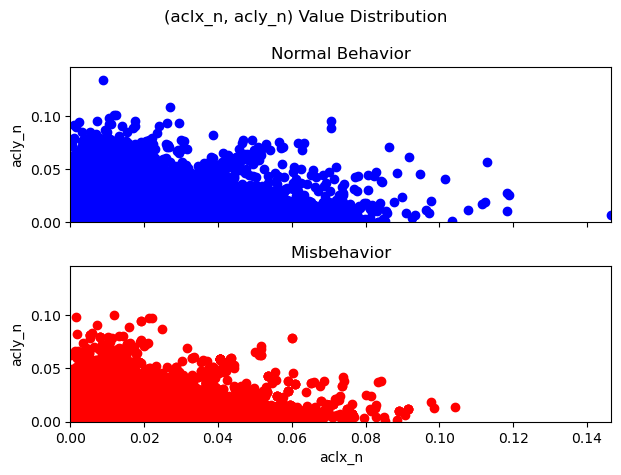

In [29]:
from matplotlib import pyplot as plt
min_aclx_n = min(df['aclx_n'])
max_aclx_n = max(df['aclx_n'])
min_acly_n = min(df['acly_n'])
max_acly_n = max(df['acly_n'])
min_val = min(min_aclx_n, min_acly_n)
max_val = max(max_aclx_n, max_acly_n)

fig, axs = plt.subplots(2)
fig.suptitle('(aclx_n, acly_n) Value Distribution')

bisxyn_n_Val_x = df[df['class'] == 0]['aclx_n'].tolist()
bisxyn_n_Val_y = df[df['class'] == 0]['acly_n'].tolist()

axs[0].scatter(bisxyn_n_Val_x, bisxyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('aclx_n')
axs[0].set_ylabel('acly_n')
axs[0].set_xlim(min_val, max_val)
axs[0].set_ylim(min_val, max_val)

bisxyn_d_Val_x = df[df['class'] != 0]['aclx_n'].tolist()
bisxyn_d_Val_y = df[df['class'] != 0]['acly_n'].tolist()

axs[1].scatter(bisxyn_d_Val_x, bisxyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('aclx_n')
axs[1].set_ylabel('acly_n')
axs[1].set_xlim(min_val, max_val)
axs[1].set_ylim(min_val, max_val)

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, the pair <b>(aclx_n, acly_n)</b> has correlations with the misbehavior outcome, since there are a rectangle that only belongs to misbehaviors.</p> (instead of normal behaviors)
<p>Then we inspect the original heading position characteristics (variable <b>hedz</b> has value 0, and I do not consider it as a relevant variable)</p>

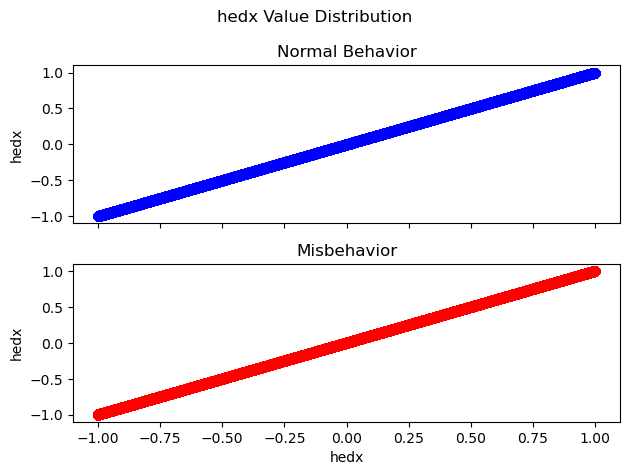

In [21]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('hedx Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['hedx'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedx')
axs[0].set_ylabel('hedx')

spdx_d_Val_x = df[df['class'] != 0]['hedx'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedx')
axs[1].set_ylabel('hedx')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

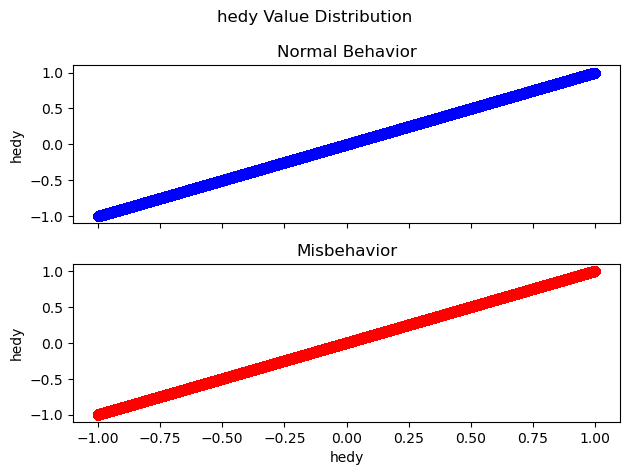

In [22]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('hedy Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['hedy'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedy')
axs[0].set_ylabel('hedy')

spdx_d_Val_x = df[df['class'] != 0]['hedy'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedy')
axs[1].set_ylabel('hedy')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

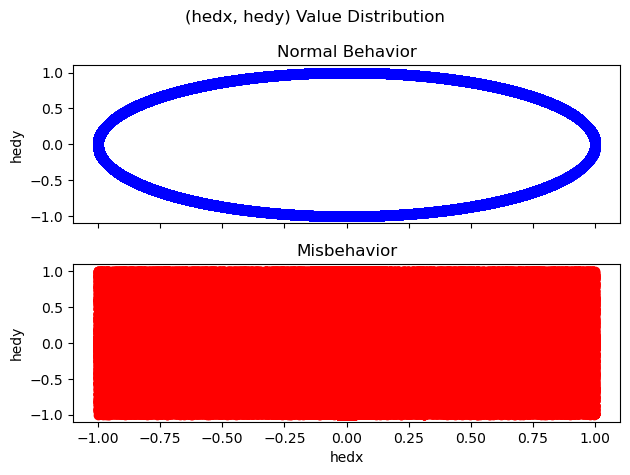

In [23]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('(hedx, hedy) Value Distribution')

bisxyn_n_Val_x = df[df['class'] == 0]['hedx'].tolist()
bisxyn_n_Val_y = df[df['class'] == 0]['hedy'].tolist()

axs[0].scatter(bisxyn_n_Val_x, bisxyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedx')
axs[0].set_ylabel('hedy')

bisxyn_d_Val_x = df[df['class'] != 0]['hedx'].tolist()
bisxyn_d_Val_y = df[df['class'] != 0]['hedy'].tolist()

axs[1].scatter(bisxyn_d_Val_x, bisxyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedx')
axs[1].set_ylabel('hedy')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

<p>By observation, the pair <b>(hedx, hedy)</b> has correlations with the misbehavior outcome, since there are a rectangle that only belongs to misbehaviors, the normal behavior only has a circle.</p>
<p>Then we inspect the normalized heading position characteristics (variable <b>hedz_n</b> has value 0, and I do not consider it as a relevant variable)</p>

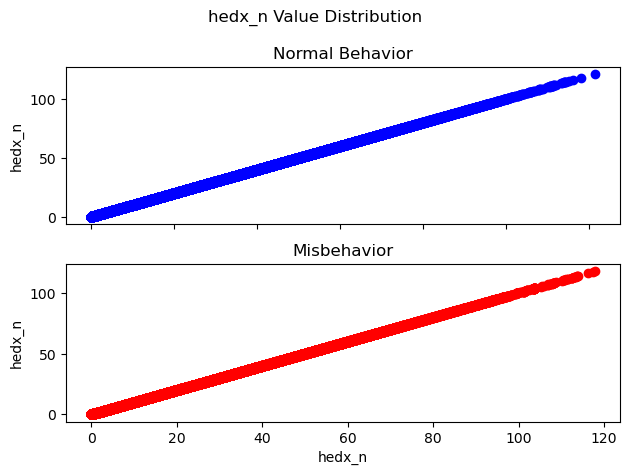

In [24]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('hedx_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['hedx_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedx_n')
axs[0].set_ylabel('hedx_n')

spdx_d_Val_x = df[df['class'] != 0]['hedx_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedx_n')
axs[1].set_ylabel('hedx_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

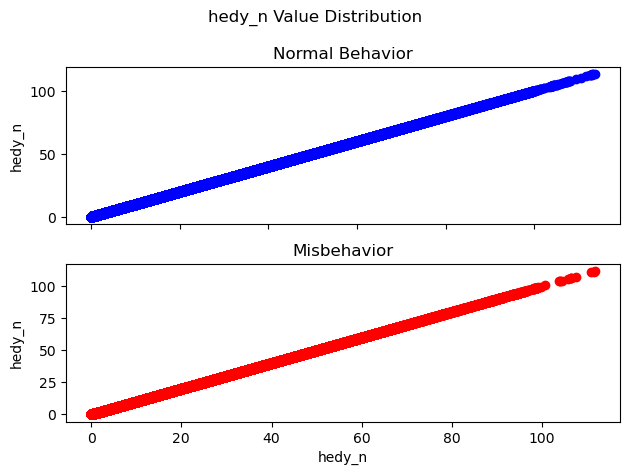

In [25]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('hedy_n Value Distribution')

spdx_n_Val_x = df[df['class'] == 0]['hedy_n'].tolist()
spdx_n_Val_y = spdx_n_Val_x

axs[0].scatter(spdx_n_Val_x, spdx_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedy_n')
axs[0].set_ylabel('hedy_n')

spdx_d_Val_x = df[df['class'] != 0]['hedy_n'].tolist()
spdx_d_Val_y = spdx_d_Val_x

axs[1].scatter(spdx_d_Val_x, spdx_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedy_n')
axs[1].set_ylabel('hedy_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

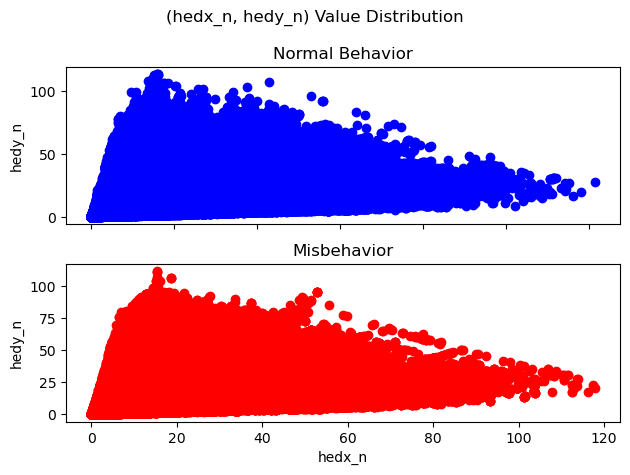

In [26]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(2)
fig.suptitle('(hedx_n, hedy_n) Value Distribution')

bisxyn_n_Val_x = df[df['class'] == 0]['hedx_n'].tolist()
bisxyn_n_Val_y = df[df['class'] == 0]['hedy_n'].tolist()

axs[0].scatter(bisxyn_n_Val_x, bisxyn_n_Val_y, color='blue')
axs[0].set_title('Normal Behavior')
axs[0].set_xlabel('hedx_n')
axs[0].set_ylabel('hedy_n')

bisxyn_d_Val_x = df[df['class'] != 0]['hedx_n'].tolist()
bisxyn_d_Val_y = df[df['class'] != 0]['hedy_n'].tolist()

axs[1].scatter(bisxyn_d_Val_x, bisxyn_d_Val_y, color='red')
axs[1].set_title('Misbehavior')
axs[1].set_xlabel('hedx_n')
axs[1].set_ylabel('hedy_n')

for ax in axs.flat:
    ax.label_outer()

plt.tight_layout()
plt.show()

As you can see, there are some points different between normal behavior and misbehavior. Therefore, the pair <b>(hedx_n, hedy_n)</b> is a relevant variable in the misbehaivor classification.

<b>Final Result</b>: only 17 features are selected: `senderPseudo`, `posx`, `posy`, `posx_n`, `posy_n`, `spdx`, `spdy`, `spdx_n`, `spdy_n`, `aclx`, `acly`, `aclx_n`, `acly_n`, `hedx`, `hedy`, `hedx_n`, `hedy_n`

<p><b>Method 2</b>: f-test in one-way Analysis of Variance (ANOVA)</p>

In [13]:
import pandas as pd
from scipy.stats import f_oneway
constant_features = [col for col in df.columns[:-1] if df[col].nunique() == 1]
near_constant_features = [col for col in df.columns[:-1] if (df[col].value_counts(normalize=True).max() > 0.95)]

df.drop(columns=constant_features, inplace=True)

anova_results = {}
for feature in df.columns[:-1]:
    groups = [df[df['class'] == group][feature] for group in df['class'].unique()]
    try:
        anova_results[feature] = f_oneway(*groups)
    except ValueError:
        print(f"Ignoring feature '{feature}' due to constant input.")

significant_features = []
for feature, result in anova_results.items():
    if result.pvalue < 0.05:
        significant_features.append(feature)

print("f-test in one-way Analysis of Variance (ANOVA)")
print(str(len(significant_features)) + " Significant features:" + str(significant_features))

C:\Users\david\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


f-test in one-way Analysis of Variance (ANOVA)
21 Significant features:['sendTime', 'sender', 'senderPseudo', 'messageID', 'class', 'posx', 'posy', 'posx_n', 'posy_n', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'aclx_n', 'acly_n', 'hedx', 'hedy', 'hedx_n', 'hedy_n']


<p>Now only the attribute `class` is deleted because it is the result, and some attributes with constant values have been removed too.</p>
<b>Final Result</b>: only 18 features are selected: `sendTime`, `senderPseudo`, `posx`, `posy`, `posx_n`, `posy_n`, `spdx`, `spdy`, `spdx_n`, `spdy_n`, `aclx`, `acly`, `aclx_n`, `acly_n`, `hedx`, `hedy`, `hedx_n`, `hedy_n`

<p><b>Method 3</b>: Recursive Feature Elimination (RFE)</p>

In [29]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['class'])
y = df['class']

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=12)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_].tolist()
print("Selected Features:", selected_features)

Selected Features: ['posx_n', 'posy_n', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'aclx_n', 'acly_n', 'hedx', 'hedy']


<b>Final Result</b>: only 12 features are selected: `posx_n`, `posy_n`, `spdx`, `spdy`, `spdx_n`, `spdy_n`, `aclx`, `acly`, `aclx_n`, `acly_n`, `hedx`, `hedy`

<p>Looks like there are some differences between these results and the given result from initial research.</p>

In [17]:
print("Origianl research selected features")
print("features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']")

Origianl research selected features
features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']


<p>In the next section, we use the twelve features extracted from the third original RFE method implementation: 'posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n'. Similar classification implementations (with the first and the second feature selection method's results) will take place on complementary notebooks. See file "<b>Classification based on the First Original Featuring Result.ipynb</b>" and "<b>Classification based on the Second Original Featuring Result.ipynb</b>" in the same repository.</p>

### <a class="anchor" id="bullet5-1"><p><b>Section 5.1</b>: Classification (Binary Classification Approach (BCA))</p></a>

<p>At first we need to divide dataset into training data and testing data. This is completed on each algorithm's implementation. </p>
<p>80% data is training data, while 20% remaining is testing data. (This is normal setting). However, in order to improve accuracy, some models' training-testing data ratio s are customized.</p>

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42)

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1-score:", f1)

Logistic Regression Accuracy: 0.7194606252014987
Logistic Regression Precision: 0.912851940119884
Logistic Regression Recall: 0.34124348694689666
Logistic Regression F1-score: 0.49678002549029515


In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']
}

lr = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=5, cv=5, scoring='f1', random_state=42)
random_search.fit(X_train, Y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_lr = LogisticRegression(**best_params, random_state=42)
best_lr.fit(X_train, Y_train)

Y_pred = best_lr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Improved Logistic Regression Accuracy:", accuracy)
print("Improved Logistic Regression Precision:", precision)
print("Improved Logistic Regression Recall:", recall)
print("Improved Logistic Regression F1-score:", f1)

Best Hyperparameters: {'C': 1.934347898661638, 'solver': 'saga'}
Improved Logistic Regression Accuracy: 0.7194574951249058
Improved Logistic Regression Precision: 0.9128160688310483
Improved Logistic Regression Recall: 0.3412512004072707
Improved Logistic Regression F1-score: 0.4967828869799562


In [19]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_neighbor_amount = 1

print("*********")
while n_neighbor_amount < 11:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor_amount)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("KNN Accuracy when n_neighbors =", n_neighbor_amount, ":", accuracy)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    print("KNN Precision:", precision)
    print("KNN Recall:", recall)
    print("KNN F1-score:", f1)
    print("*********")
    n_neighbor_amount += 1

*********
KNN Accuracy when n_neighbors = 1 : 0.8446057825034978
KNN Precision: 0.7937970546108928
KNN Recall: 0.8336052328115178
KNN F1-score: 0.8132142662304802
*********
KNN Accuracy when n_neighbors = 2 : 0.8693271274348083
KNN Precision: 0.9046404566798637
KNN Recall: 0.7578706221291465
KNN F1-score: 0.8247769707475441
*********
KNN Accuracy when n_neighbors = 3 : 0.8565892807396998
KNN Precision: 0.8379133393262412
KNN Recall: 0.8016676501328643
KNN F1-score: 0.8193898588373496
*********
KNN Accuracy when n_neighbors = 4 : 0.8632046976189507
KNN Precision: 0.8987416948145949
KNN Recall: 0.7470640641451365
KNN F1-score: 0.8159135663363627
*********
KNN Accuracy when n_neighbors = 5 : 0.8513464024464679
KNN Precision: 0.8532683715549975
KNN Recall: 0.7652716873580241
KNN F1-score: 0.806877930358617
*********
KNN Accuracy when n_neighbors = 6 : 0.8506843912470539
KNN Precision: 0.8987736032703912
KNN Recall: 0.7122609309375325
KNN F1-score: 0.7947207955814418
*********
KNN Accuracy 

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=20, random_state=42)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1-score:", f1)

Random Forest Accuracy: 0.8969813541337357
Random Forest Precision: 0.9021176118459888
Random Forest Recall: 0.8369413044232838
Random Forest F1-score: 0.8683081219827905


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1-score:", f1)

Decision Tree Accuracy: 0.8647900814132922
Decision Tree Precision: 0.8214166450224482
Decision Tree Recall: 0.8526289843015822
Decision Tree F1-score: 0.8367318398802618


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.31, random_state=42)

nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1-score:", f1)

Naive Bayes Accuracy: 0.6684309530276427
Naive Bayes Precision: 0.6817753018748014
Naive Bayes Recall: 0.3419155638002515
Naive Bayes F1-score: 0.4554296507703814


In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Adjust max_iter and tol
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42,
                    max_iter=100, tol=0.001)

mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("MLP Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1-score:", f1)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Accuracy: 0.821396264566594
MLP Precision: 0.9818500471341132
MLP Recall: 0.5704103946592001
MLP F1-score: 0.7216024551072036


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = (df['class'] != 0).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_shape=(len(features),), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("ANN Accuracy:", accuracy)
print("ANN Precision:", precision)
print("ANN Recall:", recall)
print("ANN F1-score:", f1)

19968/19968 [==============================] - 20s 1ms/step - loss: 0.4927 - accuracy: 0.7696
ANN Accuracy: 0.7696326375007629
ANN Precision: 0.9077370775890291
ANN Recall: 0.48121579562415395
ANN F1-score: 0.6289881081408069


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = (df['class'] != 0).astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred = model.predict(X_test)

loss, accuracy = model.evaluate(X_test, Y_test)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("CNN Accuracy:", accuracy)
print("CNN Precision:", precision)
print("CNN Recall:", recall)
print("CNN F1-score:", f1)

19968/19968 [==============================] - 25s 1ms/step - loss: 0.4689 - accuracy: 0.7864
CNN Accuracy: 0.7863503694534302
CNN Precision: 0.4259238410894255
CNN Recall: 0.7295506523659111
CNN F1-score: 0.5378448730543025


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import precision_score, recall_score, f1_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = (df['class'] != 0).astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("LSTM Accuracy:", accuracy)
print("LSTM Precision:", precision)
print("LSTM Recall:", recall)
print("LSTM F1-score:", f1)

19968/19968 [==============================] - 50s 2ms/step - loss: 0.4679 - accuracy: 0.7864
LSTM Accuracy: 0.7864004373550415
LSTM Precision: 0.9758150131347494
LSTM Recall: 0.48566260552977975
LSTM F1-score: 0.6485448093651341


### <a class="anchor" id="bullet5-2"><b>Section 5.2</b>: Classification (A Multi-class Classification Approach for Three Classes (MCATC))</a>

<p>In this section, the classification requirement becomes more rigid: classifying all 20 autonomous driving behavior categories with three categories: normal behaviors, failues, and attacks.</p>

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42)

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1-score:", f1)

Logistic Regression Accuracy: 0.6727958783151424
Logistic Regression Precision: 0.7144357407883996
Logistic Regression Recall: 0.6727958783151424
Logistic Regression F1-score: 0.5863821709529868


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_neighbor_amount = 1

print("*********")
while n_neighbor_amount < 11:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor_amount)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("KNN Accuracy when n_neighbors =", n_neighbor_amount, ":", accuracy)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    print("KNN Precision:", precision)
    print("KNN Recall:", recall)
    print("KNN F1-score:", f1)
    print("*********")
    n_neighbor_amount += 1

*********
KNN Accuracy when n_neighbors = 1 : 0.8036581205142089
KNN Precision: 0.8076037445671809
KNN Recall: 0.8036581205142089
KNN F1-score: 0.8051581232902459
*********
KNN Accuracy when n_neighbors = 2 : 0.8305188727968174
KNN Precision: 0.8278893696656892
KNN Recall: 0.8305188727968174
KNN F1-score: 0.8243814341087075
*********
KNN Accuracy when n_neighbors = 3 : 0.8250866248697105
KNN Precision: 0.8232457862744831
KNN Recall: 0.8250866248697105
KNN F1-score: 0.8228626262531381
*********
KNN Accuracy when n_neighbors = 4 : 0.8282699127647654
KNN Precision: 0.8246830658042921
KNN Recall: 0.8282699127647654
KNN F1-score: 0.8223258525523869
*********
KNN Accuracy when n_neighbors = 5 : 0.8204478513589227
KNN Precision: 0.817456077133956
KNN Recall: 0.8204478513589227
KNN F1-score: 0.8159671502979492
*********
KNN Accuracy when n_neighbors = 6 : 0.8170626735236212
KNN Precision: 0.8141582405479898
KNN Recall: 0.8170626735236212
KNN F1-score: 0.8089478789716388
*********
KNN Accuracy 

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=15, random_state=42)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1-score:", f1)

Random Forest Accuracy: 0.8766327262028102
Random Forest Precision: 0.8753626296557379
Random Forest Recall: 0.8766327262028102
Random Forest F1-score: 0.8748071010469464


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1-score:", f1)

Decision Tree Accuracy: 0.8354252678563044
Decision Tree Precision: 0.8374746535466164
Decision Tree Recall: 0.8354252678563044
Decision Tree F1-score: 0.836252319094726


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1-score:", f1)

Naive Bayes Accuracy: 0.6585289892043659
Naive Bayes Precision: 0.6730747397450801
Naive Bayes Recall: 0.6585289892043659
Naive Bayes F1-score: 0.5739686501419263


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("MLP Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1-score:", f1)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLP Accuracy: 0.790485193172677
MLP Precision: 0.8197971427568225
MLP Recall: 0.790485193172677
MLP F1-score: 0.7694522000293174


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
import tensorflow.compat.v1 as tfcv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

tfcv.disable_v2_behavior()

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].apply(characterize_class).astype(int).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_shape=(len(features),), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("ANN Accuracy:", accuracy)
print("ANN Precision:", precision)
print("ANN Recall:", recall)
print("ANN F1-score:", f1)

Train on 2044676 samples, validate on 511170 samples
2042912/2044676 [============================>.] - ETA: 0s - loss: -21592525.0058 - acc: 0.3355

C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2044676/2044676 [==============================] - 67s 33us/sample - loss: -21642575.4449 - acc: 0.3355 - val_loss: -83544123.4203 - val_acc: 0.3725


C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ANN Accuracy: 0.37111753
ANN Precision: 0.6776982745650227
ANN Recall: 0.37111753124598956
ANN F1-score: 0.36118280116010315


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import warnings

warnings.filterwarnings("ignore", message="From .*: The name tf.nn.max_pool is deprecated.")

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("CNN Accuracy:", accuracy)
print("CNN Precision:", precision)
print("CNN Recall:", recall)
print("CNN F1-score:", f1)

Train on 2044676 samples, validate on 511170 samples
2044480/2044676 [============================>.] - ETA: 0s - loss: -18682453.8415 - acc: 0.3357

C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2044676/2044676 [==============================] - 110s 54us/sample - loss: -18685289.8329 - acc: 0.3357 - val_loss: -70642384.9039 - val_acc: 0.3376


C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


CNN Accuracy: 0.3364316
CNN Precision: 0.6569807298217154
CNN Recall: 0.33643158748094565
CNN F1-score: 0.32793673276113006


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def characterize_class(value):
    if value == 0:
        return 0
    elif value >= 1 and value <= 12:
        return 1
    else:
        return 2

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].apply(characterize_class).astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("LSTM Accuracy:", accuracy)
print("LSTM Precision:", precision)
print("LSTM Recall:", recall)
print("LSTM F1-score:", f1)

Train on 2044676 samples, validate on 511170 samples
2044352/2044676 [============================>.] - ETA: 0s - loss: -157.0326 - acc: 0.4527

C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


2044676/2044676 [==============================] - 311s 152us/sample - loss: -157.0772 - acc: 0.4527 - val_loss: -334.5553 - val_acc: 0.5166


C:\Users\david\anaconda3\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


LSTM Accuracy: 0.5162091
LSTM Precision: 0.71346929809309
LSTM Recall: 0.5162091016367171
LSTM F1-score: 0.4803191616109452


### <a class="anchor" id="bullet5-3"><b>Section 5.3</b>: Classification (A Classic Learning Approach for Multi-class classification (C-LAMC))</a>
<p>From section 5.2, the classification requirement becomes more rigid: classifying all 20 autonomous driving behavior categories individually.</p>

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

lr = LogisticRegression(random_state=42, max_iter=1000)

lr.fit(X_train, Y_train)

Y_pred = lr.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='micro')
recall = recall_score(Y_test, Y_pred, average='micro')
f1 = f1_score(Y_test, Y_pred, average='micro')

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1-score:", f1)

Logistic Regression Accuracy: 0.6344414847831327
Logistic Regression Precision: 0.6344414847831327
Logistic Regression Recall: 0.6344414847831327
Logistic Regression F1-score: 0.6344414847831327


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore", category=FutureWarning)

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

n_neighbor_amount = 1

print("*********")
while n_neighbor_amount < 11:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor_amount)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print("KNN Accuracy when n_neighbors =", n_neighbor_amount, ":", accuracy)
    precision = precision_score(Y_test, Y_pred, average='weighted')
    recall = recall_score(Y_test, Y_pred, average='weighted')
    f1 = f1_score(Y_test, Y_pred, average='weighted')

    print("KNN Precision:", precision)
    print("KNN Recall:", recall)
    print("KNN F1-score:", f1)
    print("*********")
    n_neighbor_amount += 1

*********
KNN Accuracy when n_neighbors = 1 : 0.7322313377008335
KNN Precision: 0.7436785051096729
KNN Recall: 0.7322313377008335
KNN F1-score: 0.7366468354220451
*********
KNN Accuracy when n_neighbors = 2 : 0.7704605281691242
KNN Precision: 0.7475046182635735
KNN Recall: 0.7704605281691242
KNN F1-score: 0.7512363968990194
*********
KNN Accuracy when n_neighbors = 3 : 0.761569545606781
KNN Precision: 0.7470172448394834
KNN Recall: 0.761569545606781
KNN F1-score: 0.7498129283349223
*********
KNN Accuracy when n_neighbors = 4 : 0.7663773432535894
KNN Precision: 0.7434012920350344
KNN Recall: 0.7663773432535894
KNN F1-score: 0.7475910810757723
*********
KNN Accuracy when n_neighbors = 5 : 0.7592376385450152
KNN Precision: 0.736476982590807
KNN Recall: 0.7592376385450152
KNN F1-score: 0.7408182090161983
*********
KNN Accuracy when n_neighbors = 6 : 0.7553735589909885
KNN Precision: 0.7249944016236805
KNN Recall: 0.7553735589909885
KNN F1-score: 0.7295217899426095
*********
KNN Accuracy wh

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=10, random_state=42)

rf.fit(X_train, Y_train)

Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Random Forest Accuracy:", accuracy)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1-score:", f1)

Random Forest Accuracy: 0.8264544683408404
Random Forest Precision: 0.8203597379628255
Random Forest Recall: 0.8264544683408404
Random Forest F1-score: 0.8195545794290235


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, Y_train)

Y_pred = dt.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Decision Tree Accuracy:", accuracy)
print("Decision Tree Precision:", precision)
print("Decision Tree Recall:", recall)
print("Decision Tree F1-score:", f1)

Decision Tree Accuracy: 0.7847289823181973
Decision Tree Precision: 0.790760663964826
Decision Tree Recall: 0.7847289823181973
Decision Tree F1-score: 0.7869574923559319


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("Naive Bayes Accuracy:", accuracy)
print("Naive Bayes Precision:", precision)
print("Naive Bayes Recall:", recall)
print("Naive Bayes F1-score:", f1)

Naive Bayes Accuracy: 0.6468522384742754
Naive Bayes Precision: 0.6128961783665571
Naive Bayes Recall: 0.6468522384742754
Naive Bayes F1-score: 0.5272310068331603


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=42)

mlp.fit(X_train, Y_train)

Y_pred = mlp.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("MLP Accuracy:", accuracy)
print("MLP Precision:", precision)
print("MLP Recall:", recall)
print("MLP F1-score:", f1)

C:\Users\david\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Accuracy: 0.7247895806010373
MLP Precision: 0.6015638405907547
MLP Recall: 0.7247895806010373
MLP F1-score: 0.6376614391053204


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features]
Y = df['class'].astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(64, input_shape=(len(features),), activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("ANN Accuracy:", accuracy)
print("ANN Precision:", precision)
print("ANN Recall:", recall)
print("ANN F1-score:", f1)

C:\Users\david\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63897/63897 ━━━━━━━━━━━━━━━━━━━━ 69s 1ms/step - accuracy: 0.0137 - loss: -137575940096.0000 - val_accuracy: 0.0137 - val_loss: -1941882535936.0000
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 15s 727us/step
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 15s 733us/step - accuracy: 0.0136 - loss: -1960076115968.0000


C:\Users\david\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ANN Accuracy: 0.013424898497760296
ANN Precision: 0.00018022789993040557
ANN Recall: 0.013424898507266473
ANN F1-score: 0.0003556808209387275


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("CNN Accuracy:", accuracy)
print("CNN Precision:", precision)
print("CNN Recall:", recall)
print("CNN F1-score:", f1)

C:\Users\david\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


63897/63897 ━━━━━━━━━━━━━━━━━━━━ 111s 2ms/step - accuracy: 0.0139 - loss: -202919559168.0000 - val_accuracy: 0.0137 - val_loss: -2786442608640.0000
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 20s 991us/step
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 21s 1ms/step - accuracy: 0.0136 - loss: -2812324610048.0000
CNN Accuracy: 0.013424898497760296
CNN Precision: 0.9867553293926639
CNN Recall: 0.013424898507266473
CNN F1-score: 0.0003556808209387275


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

features = ['posx', 'posy', 'spdx', 'spdy', 'spdx_n', 'spdy_n', 'aclx', 'acly', 'hedx', 'hedy', 'hedx_n', 'hedy_n']
X = df[features].values
Y = df['class'].astype(int).values

sequence_length = len(features)
X = X.reshape(-1, sequence_length, 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = Sequential([
    LSTM(64, input_shape=(sequence_length, 1)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=1, batch_size=32, validation_split=0.2)

Y_pred_prob = model.predict(X_test)
Y_pred = (Y_pred_prob > 0.5).astype(int)

loss, accuracy = model.evaluate(X_test, Y_test)

Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

precision = precision_score(Y_test, Y_pred, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred, average='weighted')
f1 = f1_score(Y_test, Y_pred, average='weighted')

print("LSTM Accuracy:", accuracy)
print("LSTM Precision:", precision)
print("LSTM Recall:", recall)
print("LSTM F1-score:", f1)

63897/63897 ━━━━━━━━━━━━━━━━━━━━ 250s 4ms/step - accuracy: 0.0139 - loss: -3804.7917 - val_accuracy: 0.0137 - val_loss: -15137.7373
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 37s 2ms/step
19968/19968 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.0136 - loss: -15238.0078
LSTM Accuracy: 0.013424898497760296
LSTM Precision: 0.9867553293926639
LSTM Recall: 0.013424898507266473
LSTM F1-score: 0.0003556808209387275


### <a class="anchor" id="bullet5-4"><b>Section 5.4</b>: Classification (A Guided Learning Approach for Multi-class Classification (G-LAMC))</a>

<p>Because the original research work does not mention any detailed information of the method "<b>A Guided Learning Approach for Multi-class Classification(G-LAMC)</b>", the last part of research (this part) has to be skipped.</p>

<b>Section 6</b>: Performance Matrices

<b>Section 7</b>: Discussions

<b>Section 8</b>: Conclusions

### <a class="anchor" id="bib"><b>Bibliography</b></a>

[1] J. Kamel, “Github repository: Framework for misbehavior detection (f2md),” 2019. [Online]. Available: https://github.com/josephkamel/f2md

[2] O. Slama, B. Alaya, and S. Zidi, “Towards Misbehavior Intelligent Detection Using Guided Machine Learning in Vehicular Ad-hoc Networks (VANET),” Inteligencia Artificial, vol. 25, no. 70, pp. 138–154, 2022, doi: 10.4114/intartif.vol25iss70pp138-154.

[3] O. Slama, B. Alaya, S. Zidi, and M. Tarhouni, “Comparative Study of Misbehavior Detection System for Classifying misbehaviors on VANET.,” in 2022 8th International Conference on Control, Decision and Information Technologies (CoDIT). IEEE, May 2022, vol. 1, pp. 243–248.